In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

In [4]:
gdf = gpd.read_file('/Users/duan114/Downloads/Hearing loss project/coutinuous states_county level')

In [5]:
data = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/paper writing/data/data_for_correlation.csv')

In [6]:
gdf['FIPS'] = gdf['FIPS'].astype(int)

In [7]:
data['FIPS'] = data['FIPS'].astype(int)

In [8]:
gdf = gdf.merge(data, on='FIPS')

In [9]:
gdf['POI density'] = gdf['POI density']*100

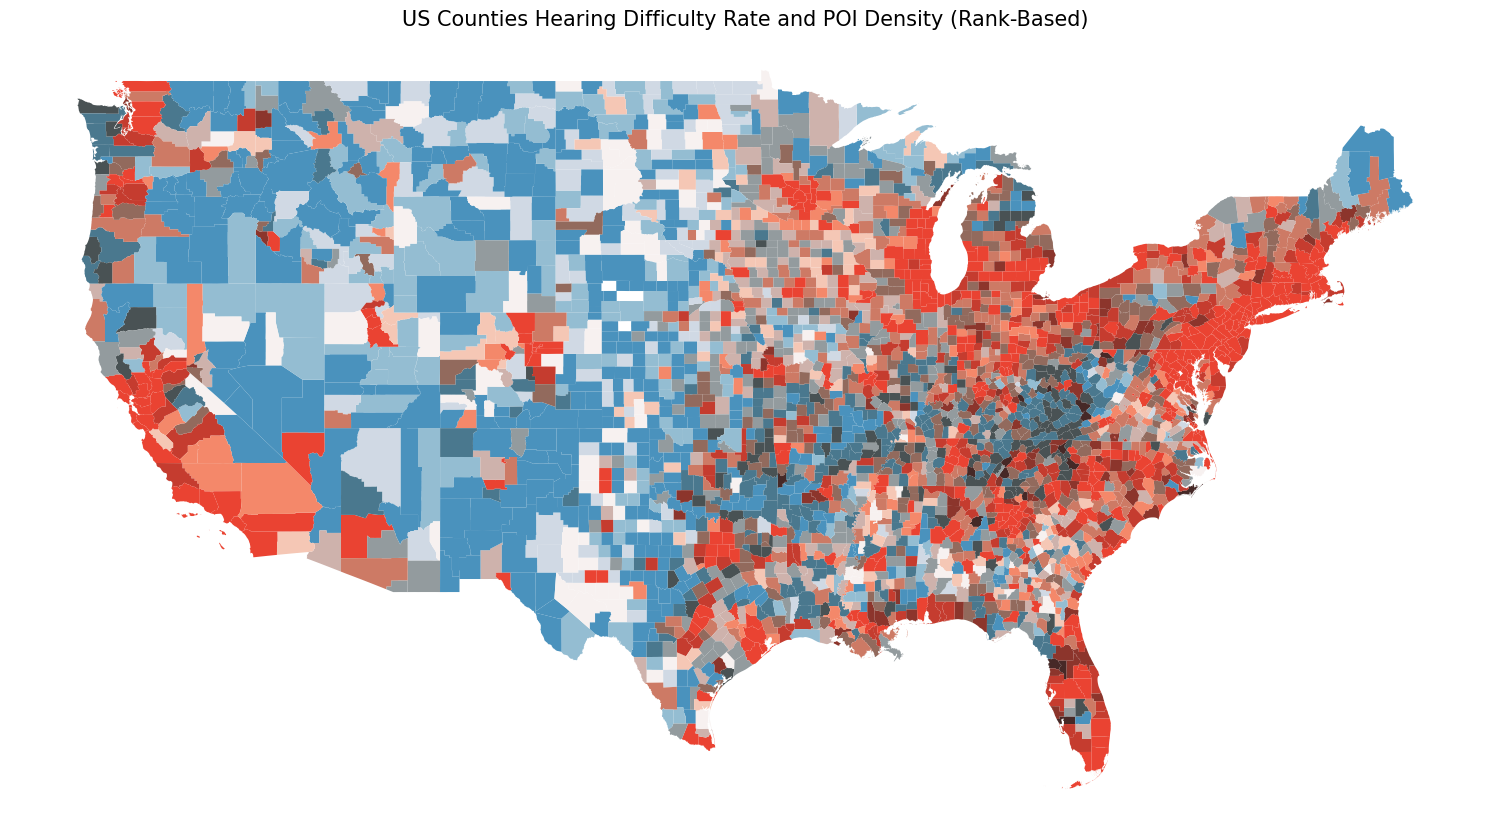

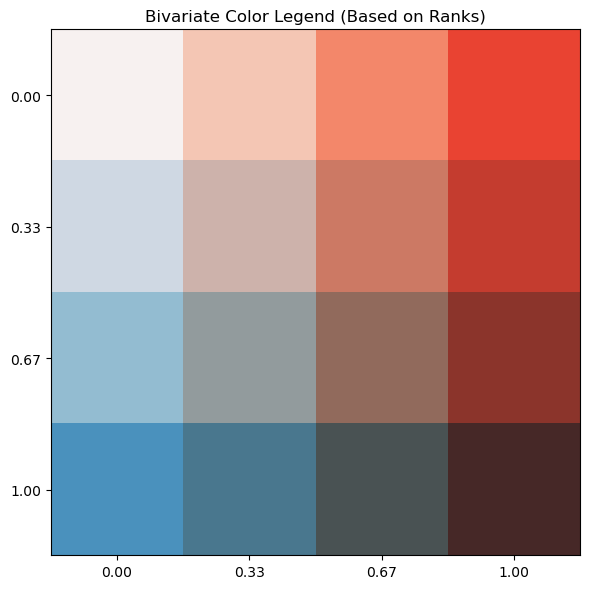

In [12]:
gdf['hearing_rank'] = gdf['hearing loss rate'].rank(method='min') / len(gdf)
gdf['poi_rank'] = gdf['POI density'].rank(method='min') / len(gdf)

hearing_colors = [plt.cm.Blues(x)[:3] for x in np.linspace(0, 0.6, 4)]
poi_colors = [plt.cm.Reds(x)[:3] for x in np.linspace(0, 0.6, 4)]
bivariate_colors = np.array([[[hc[0] * pc[0], hc[1] * pc[1], hc[2] * pc[2]] 
                              for pc in poi_colors] for hc in hearing_colors])

hearing_bins = pd.cut(gdf['hearing_rank'], bins=4, labels=False)
poi_bins = pd.cut(gdf['poi_rank'], bins=4, labels=False)
color_indices = hearing_bins * 4 + poi_bins
colors = bivariate_colors.reshape(-1, 3)[color_indices]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

gdf.plot(ax=ax, color=colors)
ax.set_title('US Counties Hearing Difficulty Rate and POI Density (Rank-Based)', fontsize=15)
ax.axis('off')

plt.tight_layout()
plt.savefig('us_counties_map.png')
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(bivariate_colors, aspect='auto')
ax.set_xticks(range(4))
ax.set_yticks(range(4))
ax.set_xticklabels([f'{i/3:.2f}' for i in range(4)])
ax.set_yticklabels([f'{i/3:.2f}' for i in range(4)])
ax.xaxis.set_label_position('top')

ax.set_title('Bivariate Color Legend (Based on Ranks)')

plt.tight_layout()
plt.savefig('bivariate_color_legend.png')
plt.show()


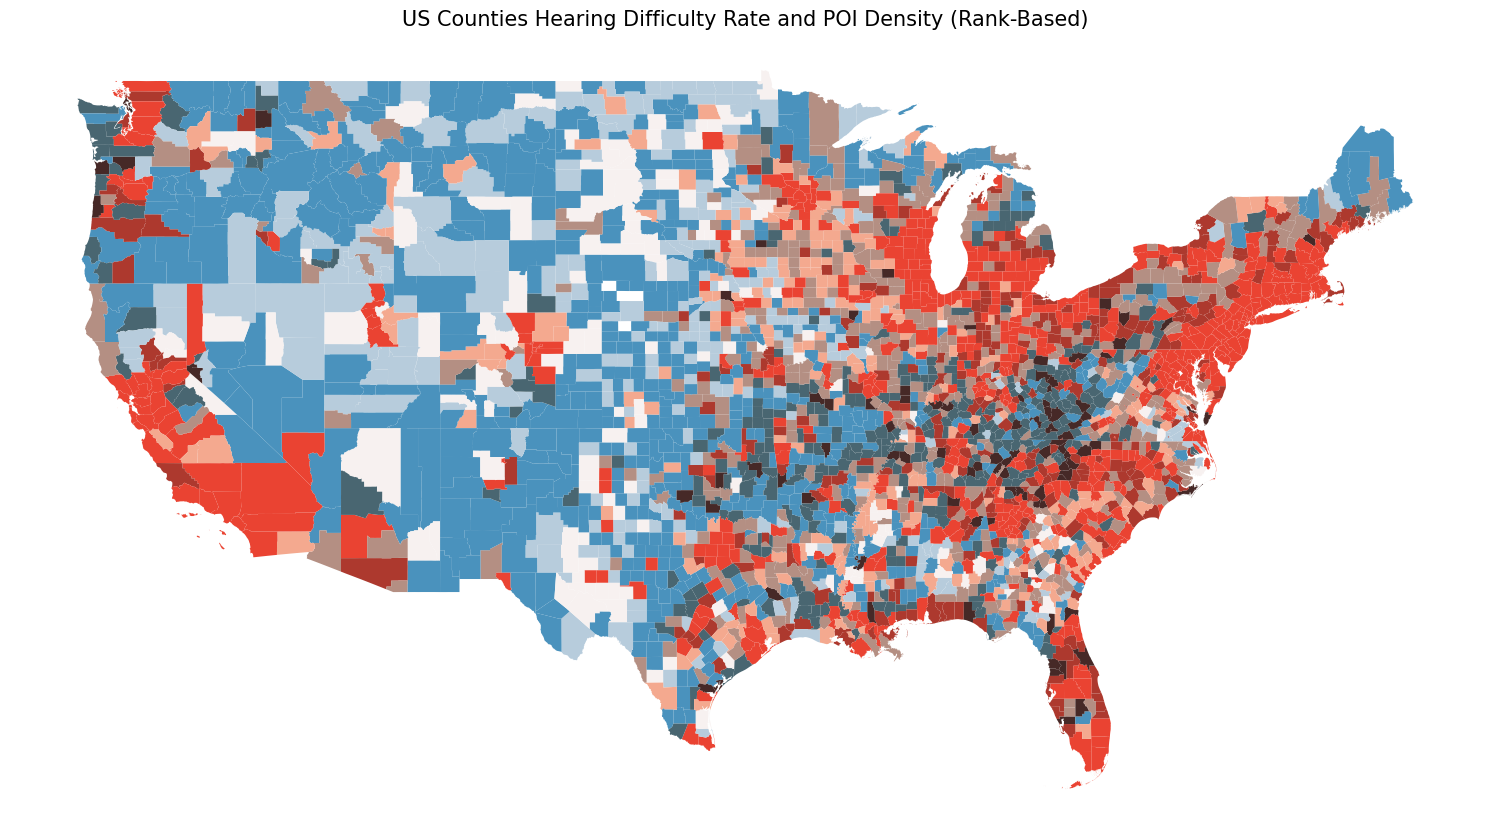

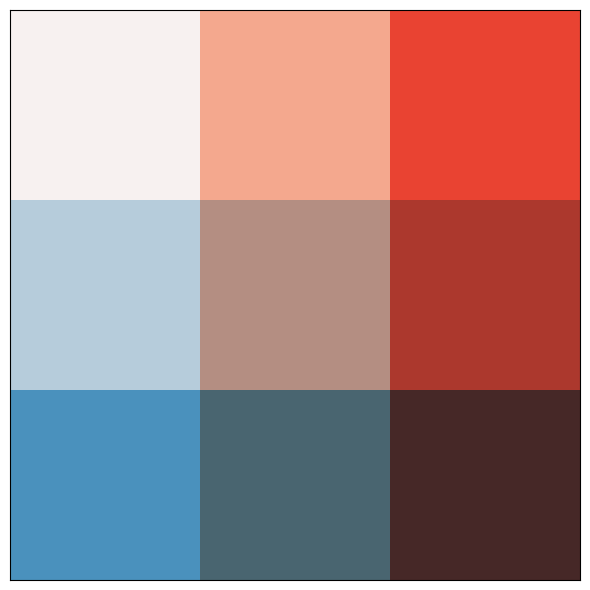

In [20]:
hearing_colors = [plt.cm.Blues(x)[:3] for x in np.linspace(0, 0.6, 3)]
poi_colors = [plt.cm.Reds(x)[:3] for x in np.linspace(0, 0.6, 3)]
bivariate_colors = np.array([[[hc[0] * pc[0], hc[1] * pc[1], hc[2] * pc[2]] 
                              for pc in poi_colors] for hc in hearing_colors])

hearing_bins = pd.cut(gdf['hearing_rank'], bins=3, labels=False)
poi_bins = pd.cut(gdf['poi_rank'], bins=3, labels=False)
color_indices = hearing_bins * 3 + poi_bins
colors = bivariate_colors.reshape(-1, 3)[color_indices]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

gdf.plot(ax=ax, color=colors)
ax.set_title('US Counties Hearing Difficulty Rate and POI Density (Rank-Based)', fontsize=15)
ax.axis('off')

plt.tight_layout()
#plt.savefig('us_counties_map.png')
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(bivariate_colors, aspect='auto')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()  


plt.tight_layout()
plt.show()

